# Proyecto 1 Mineria de datos

Se analizara el contexto economico y politico para poder encontrar estrategias apropiadas para poder invertir en la salud global

### Se importan librerias

In [3]:
# Se importan librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

### Se leen los archivos

In [4]:
# Se carga el archivo de datos
expenditure = pd.read_csv('Expenditure.csv', encoding='latin1')
Personnel = pd.read_csv('Personnel.csv', encoding='latin1')

## Limpieza de datos

Primer paso
Se establecen los encabezados correctos en Personnel y expenditure

In [5]:
# Primer paso de limpieza de datos
# Hacer que la primera fila sea el encabezado
expenditure.columns = expenditure.iloc[0]
expenditure = expenditure[1:]

Personnel.columns = Personnel.iloc[0]
Personnel = Personnel[1:]


Segundo paso
Se cambia el nombre de la columna Nan por country name en Personnel y expenditure

In [6]:
# Segundo paso de limpieza de datos
# Cambiar el nombre de la segunda columna (La cual no tiene nombre y cuando la imprimo me muestra NaN) por Country
expenditure = expenditure.rename(columns={expenditure.columns[1]: 'Country Name'})
Personnel = Personnel.rename(columns={Personnel.columns[1]: 'Country Name'})


Tercer paso de limpieza
Se preparan columnas number y per 1000 population en Personnel

In [7]:
# Remplazar parte de los valores de string en la columna Series
Personnel["Series"] = Personnel["Series"].str.replace("Health personnel: ", "")

#con regex extrae de forma unique los valores que estan entre parebtesis en series 
Series = Personnel["Series"].str.extract(r"\((.*?)\)", expand=False)

for serie in Series.unique():
    Personnel[serie] = 0
    Personnel.loc[Personnel["Series"].str.contains(serie), serie] = 1


Cuarto Paso
Se corrigen los Values en base a su unidad en Personnel

In [8]:
# Convertir la columna "Value" a cadena antes de aplicar métodos .str
Personnel['Value'] = Personnel['Value'].astype(str)

# Aplicar los métodos .str para reemplazar los caracteres no deseados
Personnel['Value'] = Personnel['Value'].str.replace(',', '').str.replace(' ', '').str.replace('..', '0')

# Si number es 1, dividir value / 1000
Personnel["Value"] = Personnel["Value"].astype(float)
Personnel.loc[Personnel["number"] == 1, "Value"] = Personnel["Value"] / 1000


#eliminar categorias 
Personnel = Personnel.drop(columns=["per 1000 population", "number"])


Quinto paso
Se establece las categorias de profesion en Personnel

In [9]:
Personnel['Series'] = Personnel['Series'].str.replace(' (per 1000 population)', '')
Personnel['Series'] = Personnel['Series'].str.replace(' (number)', '')



categorias = Personnel["Series"].unique()
for categoria in categorias:
    Personnel[categoria] = 0
    Personnel.loc[Personnel["Series"].str.contains(categoria), categoria] = 1#

Personnel = Personnel.drop(columns=["Series"])
Personnel = Personnel.drop(columns=["Footnotes"])



Sexto paso
se unifican datos repetidos en Personnel

In [10]:
# Agrupar por las columnas mencionadas y sumar la columna 'Values'
Personnel = Personnel.groupby(['Country Name', 'Year', 'Source', 'Physicians', 'Pharmacists', 'Nurses and midwives', 'Nurses and midwives personnel', 'Dentists'])['Value'].sum().reset_index()

# Identificar la columna con menor valor y eliminarla
columnas = ['Physicians', 'Pharmacists', 'Nurses and midwives', 'Nurses and midwives personnel', 'Dentists']
columna_con_menor_valor = min(columnas, key=lambda x: Personnel[x].sum())
columnas.remove(columna_con_menor_valor)
Personnel.drop(columns=columna_con_menor_valor, inplace=True)


Septimo Paso
Se eliminan columnas consideradas innecesarias en Personnel

In [11]:

#eliminar columna source 
Personnel = Personnel.drop(columns=["Source"])

Octavo paso
Se establece las unidades del value a trabajar para expenditure

In [12]:
#con regex extrae de forma unique los valores que estan entre parebtesis en series 
Series = expenditure["Series"].str.extract(r"\((.*?)\)", expand=False)


for serie in Series.unique():
    expenditure[serie] = 0
    expenditure.loc[expenditure["Series"].str.contains(serie), serie] = 1

#eliminar columna series 
expenditure = expenditure.drop(columns=["Series"])



Noveno paso
Se eliminan las columnas innecesarias

In [13]:
#eliminar footnotes y source 
expenditure = expenditure.drop(columns=["Footnotes"])
expenditure = expenditure.drop(columns=["Source"])


# cast de value a float en expenditure
expenditure['Value'] = expenditure['Value'].astype(float)


Decimo paso
Se obtiene el dataframe final a trabajar

In [14]:
#Unificar tablas conforme region/country/area y year

# Unir los dos DataFrames
merged = pd.merge(expenditure, Personnel, on=['Country Name', 'Year'], how='inner')


#### Pesonnel Final

In [15]:
Personnel

,Country Name,Year,Physicians,Nurses and midwives,Nurses and midwives personnel,Dentists,Value
0,Afghanistan,2001,0,0,0,0,0.525
1,Afghanistan,2001,1,0,0,0,4.304
2,Afghanistan,2005,0,1,0,0,14.930
3,Afghanistan,2005,0,1,1,0,0.600
4,Afghanistan,2005,0,0,0,0,0.900
...,...,...,...,...,...,...,...
3733,Zimbabwe,2020,0,0,0,1,0.234
3734,Zimbabwe,2020,0,1,0,0,31.792
3735,Zimbabwe,2020,0,1,1,0,2.000
3736,Zimbabwe,2020,0,0,0,0,1.700


#### expenditure final

In [16]:
expenditure

,Region/Country/Area,Country Name,Year,Value,% of GDP,% of total government expenditure
1,4,Afghanistan,2005,9.9,1,0
2,4,Afghanistan,2010,8.6,1,0
3,4,Afghanistan,2015,10.1,1,0
4,4,Afghanistan,2018,14.2,1,0
5,4,Afghanistan,2019,14.8,1,0
...,...,...,...,...,...,...
2258,716,Zimbabwe,2010,15.2,0,1
2259,716,Zimbabwe,2015,7.6,0,1
2260,716,Zimbabwe,2018,7.9,0,1
2261,716,Zimbabwe,2019,3.9,0,1


#### Merged final

In [17]:
merged

,Region/Country/Area,Country Name,Year,Value_x,% of GDP,% of total government expenditure,Physicians,Nurses and midwives,Nurses and midwives personnel,Dentists,Value_y
0,4,Afghanistan,2005,9.9,1,0,0,1,0,0,14.930
1,4,Afghanistan,2005,9.9,1,0,0,1,1,0,0.600
2,4,Afghanistan,2005,9.9,1,0,0,0,0,0,0.900
3,4,Afghanistan,2010,8.6,1,0,0,0,0,0,0.814
4,4,Afghanistan,2010,8.6,1,0,1,0,0,0,7.101
...,...,...,...,...,...,...,...,...,...,...,...
4417,716,Zimbabwe,2020,5.2,0,1,0,0,0,1,0.234
4418,716,Zimbabwe,2020,5.2,0,1,0,1,0,0,31.792
4419,716,Zimbabwe,2020,5.2,0,1,0,1,1,0,2.000
4420,716,Zimbabwe,2020,5.2,0,1,0,0,0,0,1.700


## Analisis exploratorio

#### Tipos de datos

In [18]:
# dtypes de los dataframes
print("-----------Expenditure-----------")
print(expenditure.dtypes)
print("-----------Personnel-----------")
print(Personnel.dtypes)
print("-----------Merged-----------")
print(merged.dtypes.head(15))

-----------Expenditure-----------
0
Region/Country/Area                   object
Country Name                          object
Year                                  object
Value                                float64
% of GDP                               int64
% of total government expenditure      int64
dtype: object
-----------Personnel-----------
Country Name                      object
Year                              object
Physicians                         int64
Nurses and midwives                int64
Nurses and midwives personnel      int64
Dentists                           int64
Value                            float64
dtype: object
-----------Merged-----------
Region/Country/Area                   object
Country Name                          object
Year                                  object
Value_x                              float64
% of GDP                               int64
% of total government expenditure      int64
Physicians                             int64
Nur

#### Informacion general de Merged

In [19]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region/Country/Area                4422 non-null   object 
 1   Country Name                       4422 non-null   object 
 2   Year                               4422 non-null   object 
 3   Value_x                            4422 non-null   float64
 4   % of GDP                           4422 non-null   int64  
 5   % of total government expenditure  4422 non-null   int64  
 6   Physicians                         4422 non-null   int64  
 7   Nurses and midwives                4422 non-null   int64  
 8   Nurses and midwives personnel      4422 non-null   int64  
 9   Dentists                           4422 non-null   int64  
 10  Value_y                            4422 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 380.1+ 

#### Resumen estadistico

In [20]:
merged.describe()

,Value_x,% of GDP,% of total government expenditure,Physicians,Nurses and midwives,Nurses and midwives personnel,Dentists,Value_y
count,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000
mean,8.618431,0.499322,0.500678,0.211217,0.434645,0.217322,0.187472,50.315574
std,4.364597,0.500056,0.500056,0.408218,0.495766,0.412470,0.390334,243.570568
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000
25%,5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000
50%,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.500000
75%,10.900000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,19.167250
max,31.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4708.717000


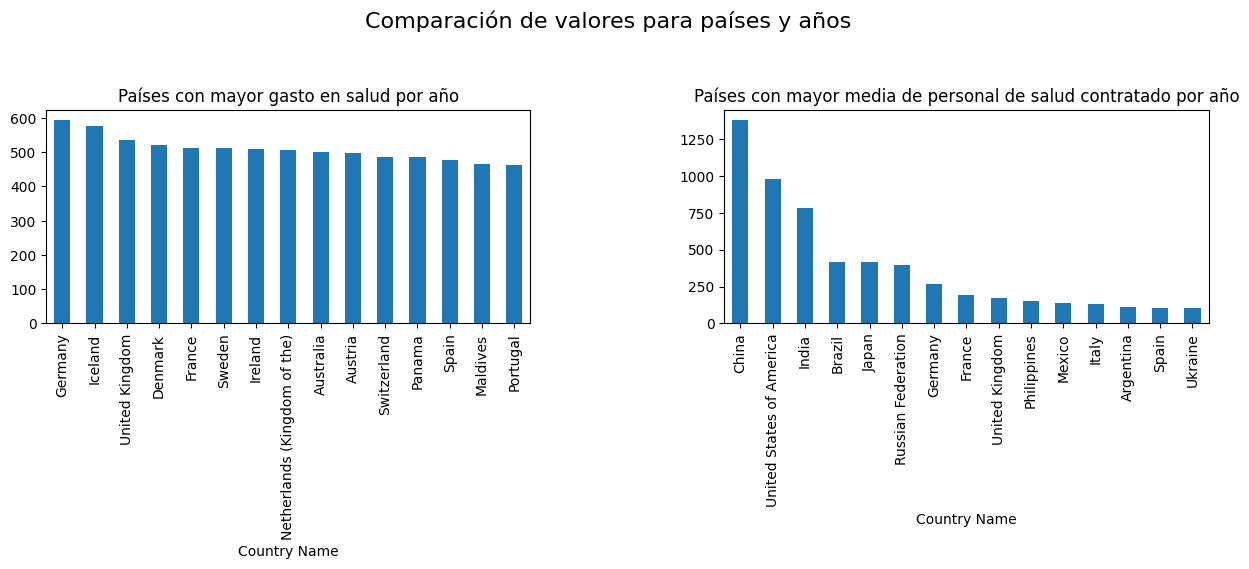

In [21]:
plt.figure(figsize=(15, 10))

# Primera figura: Países con mayor gasto en salud y personal de salud contratado
plt.subplot(3, 2, 1)
merged.groupby('Country Name')['Value_x'].sum().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor gasto en salud por año')

plt.subplot(3, 2, 2)
merged.groupby('Country Name')['Value_y'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor media de personal de salud contratado por año')


# Título general y ajustes
plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()

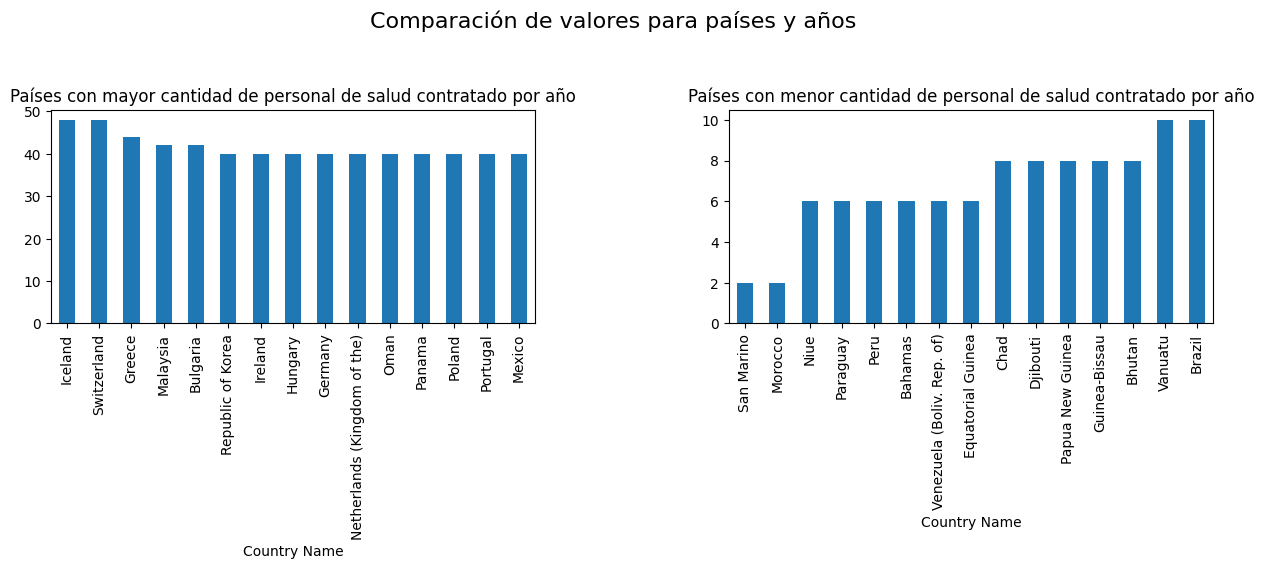

In [22]:
plt.figure(figsize=(15, 10))

# Segunda figura: Países con mayor y menor cantidad de personal de salud contratado
plt.subplot(3, 2, 1)
merged.groupby('Country Name')[['Physicians', 'Nurses and midwives', 'Nurses and midwives personnel', 'Dentists']].sum().sum(axis=1).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor cantidad de personal de salud contratado por año')

plt.subplot(3, 2, 2)
merged.groupby('Country Name')[['Physicians', 'Nurses and midwives', 'Nurses and midwives personnel', 'Dentists']].sum().sum(axis=1).sort_values(ascending=True).head(15).plot(kind='bar')
plt.title('Países con menor cantidad de personal de salud contratado por año')

plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()


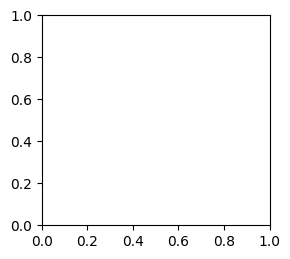

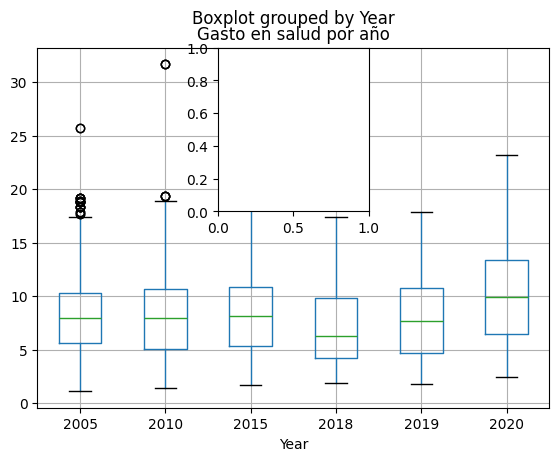

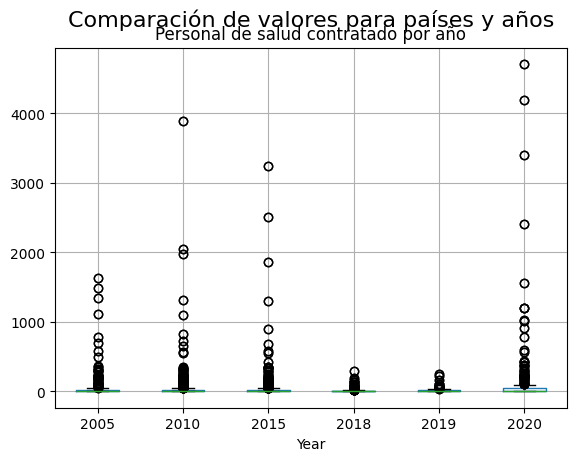

In [23]:
plt.figure(figsize=(10, 6))
# Tercera figura: Distribución de gasto y personal de salud por año
plt.subplot(2, 3, 1)
merged.boxplot(column='Value_x', by='Year')
plt.title('Gasto en salud por año')

plt.subplot(2, 3, 2)
merged.boxplot(column='Value_y', by='Year')
plt.title('Personal de salud contratado por año')

plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()

#### Analisis de correlación

In [24]:
# generar analisis de correlacion
datos_num = merged.select_dtypes(include=[float, int])
correlacion = datos_num.corr()

correlacion


,Value_x,% of GDP,% of total government expenditure,Physicians,Nurses and midwives,Nurses and midwives personnel,Dentists,Value_y
Value_x,1.000000,-0.430520,0.430520,-0.020327,-0.019550,-0.011749,0.025773,0.066215
% of GDP,-0.430520,1.000000,-1.000000,-0.000406,0.000277,0.000167,0.000072,0.000237
% of total government expenditure,0.430520,-1.000000,1.000000,0.000406,-0.000277,-0.000167,-0.000072,-0.000237
Physicians,-0.020327,-0.000406,0.000406,1.000000,-0.453724,-0.272675,-0.248561,0.035590
Nurses and midwives,-0.019550,0.000277,-0.000277,-0.453724,1.000000,0.600972,-0.421168,0.073231
Nurses and midwives personnel,-0.011749,0.000167,-0.000167,-0.272675,0.600972,1.000000,-0.253110,-0.098696
Dentists,0.025773,0.000072,-0.000072,-0.248561,-0.421168,-0.253110,1.000000,-0.078068
Value_y,0.066215,0.000237,-0.000237,0.035590,0.073231,-0.098696,-0.078068,1.000000


#### Grafica de correlación

<Figure size 1000x600 with 0 Axes>

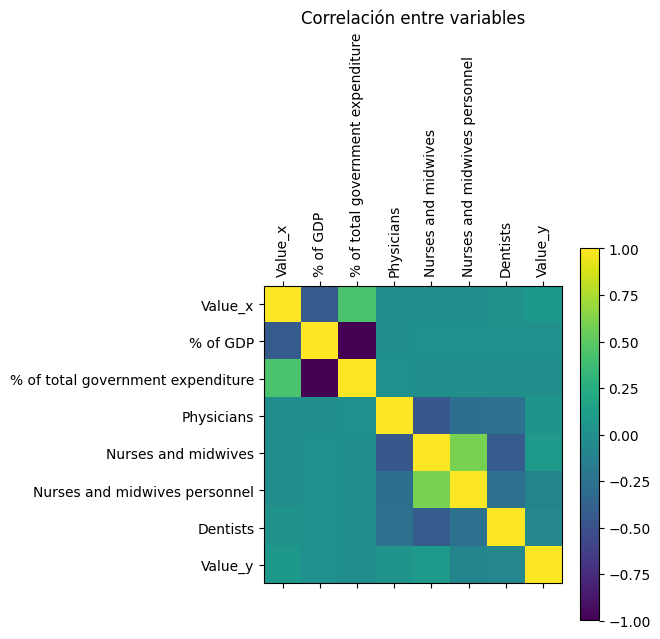

In [25]:
# Grafico de correlacion
plt.figure(figsize=(10, 6))
plt.matshow(correlacion, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=90)
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
plt.title('Correlación entre variables')
plt.show()

#### Variables categoricas

#### Tabla de frecuencia

In [26]:
# tabla de frecuencia
data_cat = merged.select_dtypes(include=[object])
tabla_frecuencia = data_cat["Country Name"].value_counts()

tabla_frecuencia

Country Name
Iceland                       48
Switzerland                   46
Greece                        46
Oman                          40
Portugal                      40
                              ..
Bahamas                        4
Venezuela (Boliv. Rep. of)     4
Paraguay                       4
Morocco                        2
San Marino                     2
Name: count, Length: 188, dtype: int64

#### Tabla de proporción

In [27]:
# Tabla de proporción
tabla_proporcion = data_cat["Country Name"].value_counts(normalize=True)

tabla_proporcion

Country Name
Iceland                       0.010855
Switzerland                   0.010403
Greece                        0.010403
Oman                          0.009046
Portugal                      0.009046
                                ...   
Bahamas                       0.000905
Venezuela (Boliv. Rep. of)    0.000905
Paraguay                      0.000905
Morocco                       0.000452
San Marino                    0.000452
Name: proportion, Length: 188, dtype: float64

#### Clustering

In [31]:
merged

,Region/Country/Area,Country Name,Year,Value_x,% of GDP,% of total government expenditure,Physicians,Nurses and midwives,Nurses and midwives personnel,Dentists,Value_y
0,4,Afghanistan,2005,9.9,1,0,0,1,0,0,14.930
1,4,Afghanistan,2005,9.9,1,0,0,1,1,0,0.600
2,4,Afghanistan,2005,9.9,1,0,0,0,0,0,0.900
3,4,Afghanistan,2010,8.6,1,0,0,0,0,0,0.814
4,4,Afghanistan,2010,8.6,1,0,1,0,0,0,7.101
...,...,...,...,...,...,...,...,...,...,...,...
4417,716,Zimbabwe,2020,5.2,0,1,0,0,0,1,0.234
4418,716,Zimbabwe,2020,5.2,0,1,0,1,0,0,31.792
4419,716,Zimbabwe,2020,5.2,0,1,0,1,1,0,2.000
4420,716,Zimbabwe,2020,5.2,0,1,0,0,0,0,1.700


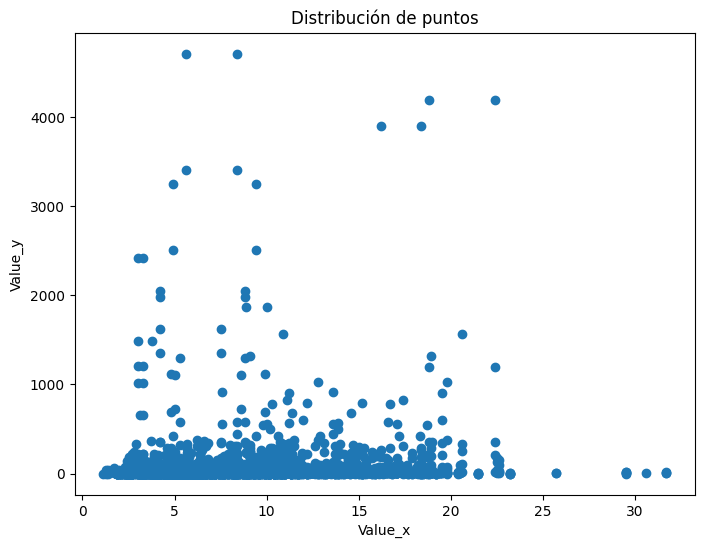

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(merged['Value_x'], merged['Value_y'])
plt.xlabel('Value_x')
plt.ylabel('Value_y')
plt.title('Distribución de puntos')
plt.show()

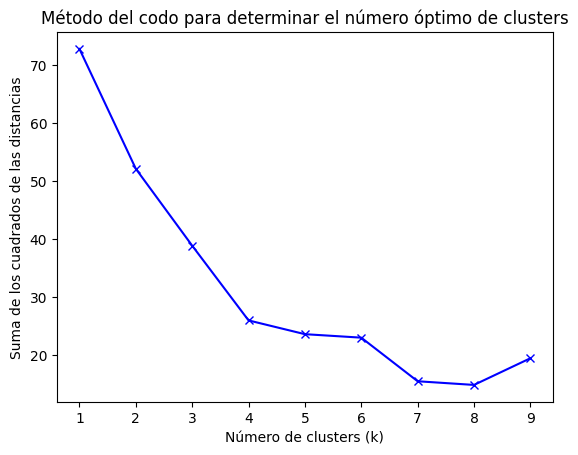

cluster
0    4170
3     208
2      34
1      10
Name: count, dtype: int64

In [51]:

distortions = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(merged[['Value_x', 'Value_y']])
    distortions.append(sum(np.min(cdist(merged[['Value_x', 'Value_y']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / merged.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()
kmeans = KMeans(n_clusters=4)
kmeans.fit(merged[['Value_x', 'Value_y']])
merged['cluster'] = kmeans.predict(merged[['Value_x', 'Value_y']])
merged['cluster'].value_counts()


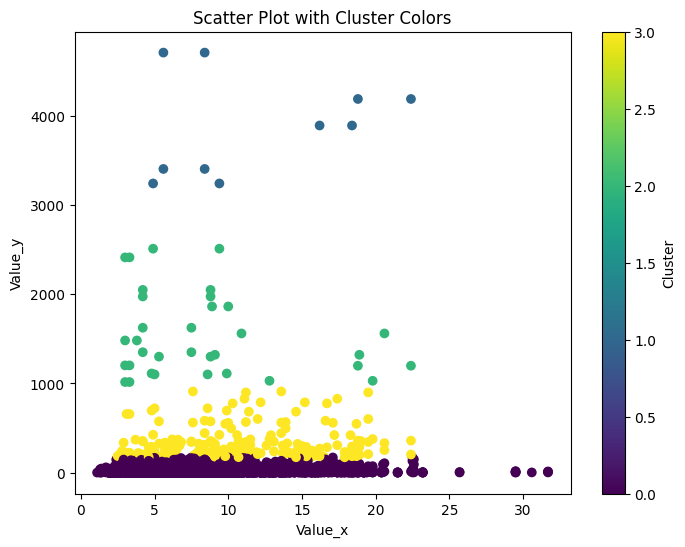

In [52]:

plt.figure(figsize=(8, 6))
plt.scatter(merged['Value_x'], merged['Value_y'], c=merged['cluster'])
plt.xlabel('Value_x')
plt.ylabel('Value_y')
plt.title('Scatter Plot with Cluster Colors')
plt.colorbar(label='Cluster')
plt.show()
